In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.linalg as la
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.io.wavfile as wav

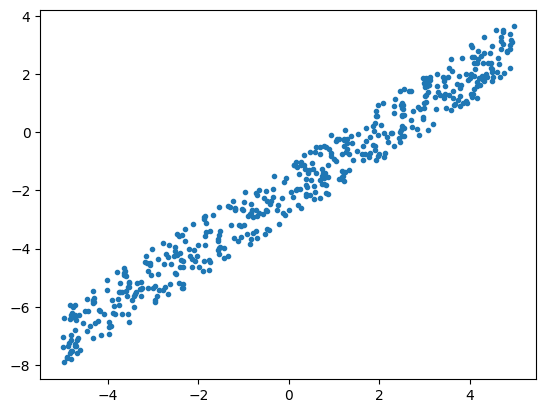

In [20]:
file = "./data/LAB4codeData/RegressData001.p"
DATASET = pickle.load(open(file, 'rb'))
DATASET.keys()
X = DATASET['x']
y = DATASET['y']

X = X.squeeze()
y = y.squeeze()

plt.plot(X, y, '.')
plt.show()

In [21]:
X = np.vstack((np.ones(500), X))
Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)

w = np.dot(la.pinv(Rx), rxy)
w

array([-2.01391133,  0.99728753])

(1500,)
(1500,)


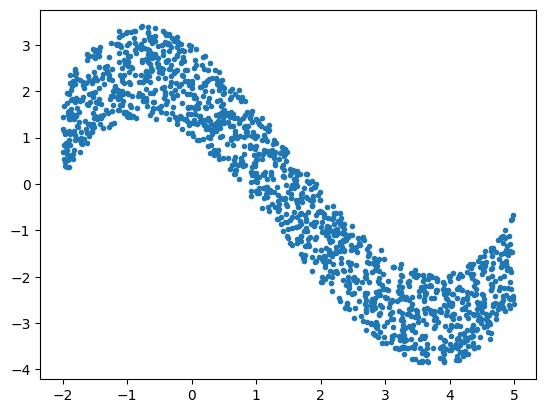

In [22]:
file = './data/LAB4codeData/RegressData002.p'

D = pickle.load(open(file, 'rb'))
D.keys()

X2 = D['x'].squeeze()
y2 = D['y'].squeeze()

print(X2.shape)
print(y2.shape)

plt.plot(X2, y2, '.')

In [23]:
X2_ones = np.vstack((np.ones(1500), X2, X2**2, X2**3))
Rx2 = np.dot(X2_ones, X2_ones.T)
rxy2 = np.dot(X2_ones, y2.T)

w2 = np.dot(la.pinv(Rx2), rxy2)

w2

array([ 2.01160905, -0.98245165, -0.51315283,  0.11294984])

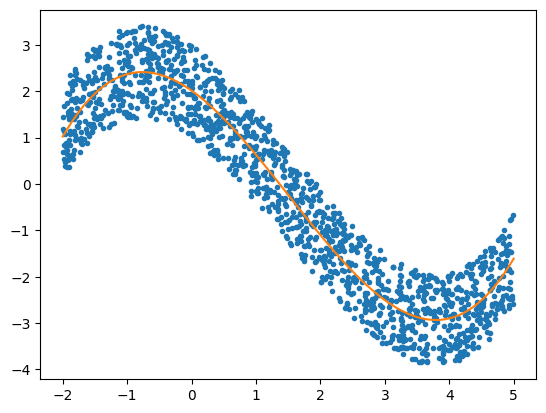

In [24]:
t = np.linspace(-2, 5, 100)
T = np.vstack((np.ones(100), t, t**2, t**3))
yt = np.dot(w2,T)


plt.plot(X2, y2, '.')
plt.plot(t, yt)

---

In [25]:
D = dt.load_diabetes()
x = D.data
y = D.target

print(x.shape)
print(y.shape)
print(D.DESCR)

(442, 10)
(442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature v

In [26]:
x1, x2, y1, y2 = train_test_split(x, y, test_size=1/3, random_state=42)
print(x1.shape)
print(x2.shape)

(294, 10)
(148, 10)


In [27]:
xa = np.vstack((np.ones(294), x1.T))
rx = np.dot(xa, xa.T)
rxy = np.dot(xa, y1)
w1 = np.dot(la.pinv(rx), rxy)

w1

array([ 150.47050072,   32.14114954, -243.77454184,  560.321881  ,
        406.14449765, -715.97724955,  394.56874273,    9.54562174,
        172.52820314,  626.90587608,  -21.05781046])

In [28]:
lr = LinearRegression().fit(x1, y1)
print(lr.coef_)
print(lr.intercept_)

[  32.14114954 -243.77454184  560.321881    406.14449765 -715.97724955
  394.56874273    9.54562174  172.52820314  626.90587608  -21.05781046]
150.47050071830287


In [29]:
m1 = np.mean(y1)
y1e = np.dot(w1, xa)

stot = np.mean((y1-m1)**2)
se = np.mean((y1-y1e)**2)

1-se/stot

np.float64(0.5093570977346067)

In [30]:
lr.score(x1, y1)

0.5093570977346067

In [31]:
lr.score(x2, y2)

0.511708877984054

---

In [32]:
file = "./data/LAB4codeData/Flute.nonvib.ff.Gb4.mono.wav"
fs, x  = wav.read(file)
fs

22050

In [33]:
x.dtype

dtype('int16')

(53514,)


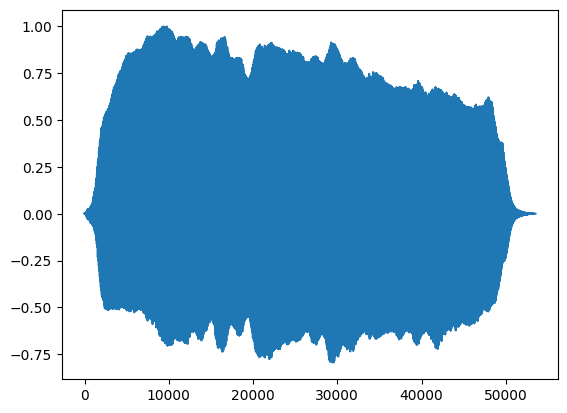

In [34]:
x = x/2.**15
plt.plot(x)
print(x.shape)

In [ ]:
x = x[:10000]